In [1]:
import pandas as pd
df = pd.read_csv('GOOG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512
...,...,...,...,...,...,...,...
4991,2024-06-18,178.789993,178.910004,175.619995,176.449997,176.449997,15640300
4992,2024-06-20,176.710007,178.740005,176.460007,177.710007,177.710007,16753200
4993,2024-06-21,178.490005,182.511993,178.059998,180.259995,180.259995,59728000
4994,2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18019600


In [2]:
df = df[['Date', 'Close']]
df


,Date,Close
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104
...,...,...
4991,2024-06-18,176.449997
4992,2024-06-20,177.710007
4993,2024-06-21,180.259995
4994,2024-06-24,180.789993


In [3]:
df['Date']

0       2004-08-19
1       2004-08-20
2       2004-08-23
3       2004-08-24
4       2004-08-25
           ...    
4991    2024-06-18
4992    2024-06-20
4993    2024-06-21
4994    2024-06-24
4995    2024-06-25
Name: Date, Length: 4996, dtype: object

In [4]:
from os.path import split
import datetime
def str_to_datetime(date_str):
    return datetime.datetime.strptime(date_str, '%Y-%m-%d')

In [5]:
df.index = df['Date']
df

,Date,Close
Date,,
2004-08-19,2004-08-19,2.499133
2004-08-20,2004-08-20,2.697639
2004-08-23,2004-08-23,2.724787
2004-08-24,2004-08-24,2.611960
2004-08-25,2004-08-25,2.640104
...,...,...
2024-06-18,2024-06-18,176.449997
2024-06-20,2024-06-20,177.710007
2024-06-21,2024-06-21,180.259995


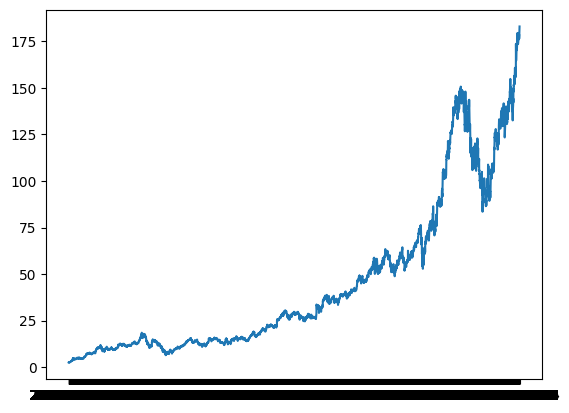

In [6]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

making windowed dataframe

In [7]:
import numpy as np
def window_df(dataframe, first_date_str, last_date_str, n=3):
    # Ensure the index is in datetime format
    if not isinstance(dataframe.index, pd.DatetimeIndex):
        dataframe.index = pd.to_datetime(dataframe.index)

    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date
    dates = []
    X, Y = [], []

    while True:
        try:
            df_subset = dataframe.loc[:target_date].tail(n+1)
        except KeyError as e:
            print(f'Error: {e}')
            return None

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return None

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        if len(next_week) < 2:
            print(f'Error: Not enough data to move to the next week from {target_date}')
            break

        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year, month, day)

        if target_date >= last_date:
            break

        target_date = next_date

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y
    return ret_df

windowed_df = window_df(df, '2012-08-19', '2024-02-25', n=3)
windowed_df



,Target Date,Target-3,Target-2,Target-1,Target
0,2012-08-19,16.654076,16.626181,16.758932,16.865286
1,2012-08-21,16.758932,16.865286,16.825434,16.675247
2,2012-08-22,16.865286,16.825434,16.675247,16.866282
3,2012-08-23,16.825434,16.675247,16.866282,16.856817
4,2012-08-24,16.675247,16.866282,16.856817,16.902395
...,...,...,...,...,...
2892,2024-02-20,147.139999,143.940002,141.759995,142.199997
2893,2024-02-21,143.940002,141.759995,142.199997,143.839996
2894,2024-02-22,141.759995,142.199997,143.839996,145.320007
2895,2024-02-23,142.199997,143.839996,145.320007,145.289993


converting into 2 X,Y list

In [8]:
def window_df_to_X_Y(windowed_data):
  df_as_np = windowed_data.to_numpy()
  dates = df_as_np[:,0]
  middle_martix = df_as_np[:,1:-1]
  X = middle_martix.reshape((len(dates), middle_martix.shape[1], 1))
  Y = df_as_np[:,-1]

  return dates,X.astype(np.float32),Y.astype(np.float32)

dates , X ,Y = window_df_to_X_Y(windowed_df)
dates.shape, X.shape,Y.shape


((2897,), (2897, 3, 1), (2897,))

training , validation, test


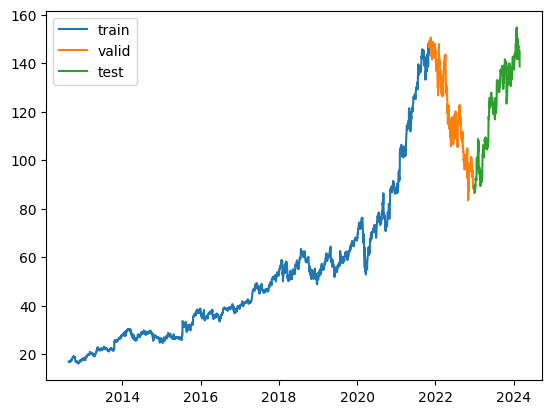

In [9]:
q_80 = int(len(dates)* .8)
q_90 = int(len(dates)* .9)
dates_train , X_train, Y_train = dates[:q_80], X[:q_80] , Y[:q_80]
dates_val,X_val,Y_val = dates[q_80:q_90],X[q_80:q_90],Y[q_80:q_90]
dates_test, X_test, Y_test = dates[q_90:],X[q_90:],Y[q_90:]

plt.plot(dates_train, Y_train)
plt.plot(dates_val,Y_val)
plt.plot(dates_test, Y_test)

plt.legend(['train','valid','test'])



sequential model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input((3, 1)),         # Input layer, expecting input shape (3, 1)
    layers.LSTM(64),              # LSTM layer with 64 units
    layers.Dense(32, activation='relu'),  # Dense (fully connected) layer with 32 units and ReLU activation
    layers.Dense(32, activation='relu'),  # Another Dense layer with 32 units and ReLU activation
    layers.Dense(1)               # Output layer with 1 unit (no activation specified, so linear activation is used by default)
])
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100
73/73 [==============================] - 3s 13ms/step - loss: 2712.2053 - mean_absolute_error: 42.5544 - val_loss: 9555.0713 - val_mean_absolute_error: 95.8390
Epoch 2/100
73/73 [==============================] - 1s 7ms/step - loss: 788.7222 - mean_absolute_error: 19.2450 - val_loss: 3348.7729 - val_mean_absolute_error: 54.9605
Epoch 3/100
73/73 [==============================] - 0s 6ms/step - loss: 116.1270 - mean_absolute_error: 3.5405 - val_loss: 220.5280 - val_mean_absolute_error: 10.7716
Epoch 4/100
73/73 [==============================] - 0s 6ms/step - loss: 8.3508 - mean_absolute_error: 1.2682 - val_loss: 43.4947 - val_mean_absolute_error: 5.3021
Epoch 5/100
73/73 [==============================] - 1s 7ms/step - loss: 2.2728 - mean_absolute_error: 0.8115 - val_loss: 25.5381 - val_mean_absolute_error: 4.1332
Epoch 6/100
73/73 [==============================] - 1s 7ms/step - loss: 1.5751 - mean_absolute_error: 0.8006 - val_loss: 13.0671 - val_mean_absolute_error: 2.857

prediction over training ds

73/73 [==============================] - 1s 3ms/step


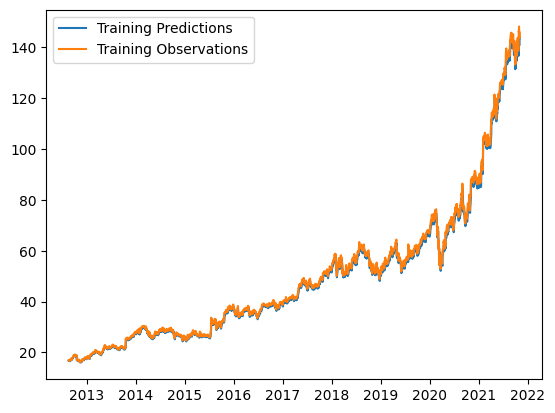

In [12]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Training Predictions', 'Training Observations'])

prediction over validation ds

10/10 [==============================] - 0s 2ms/step


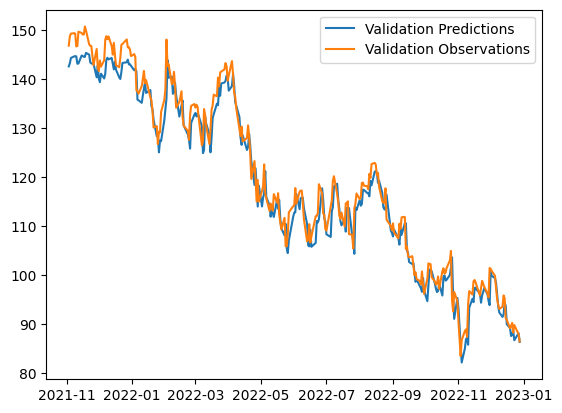

In [13]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

prediction over test ds

10/10 [==============================] - 0s 2ms/step


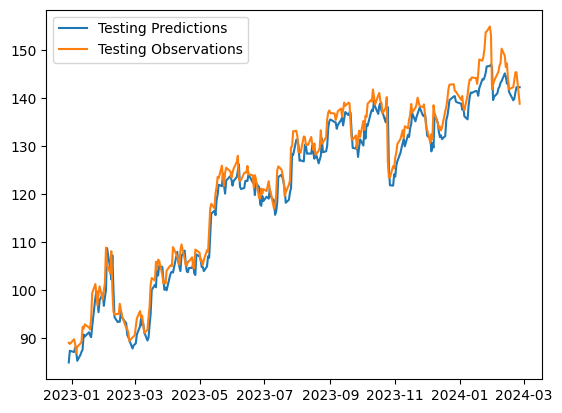

In [14]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

overall prediction

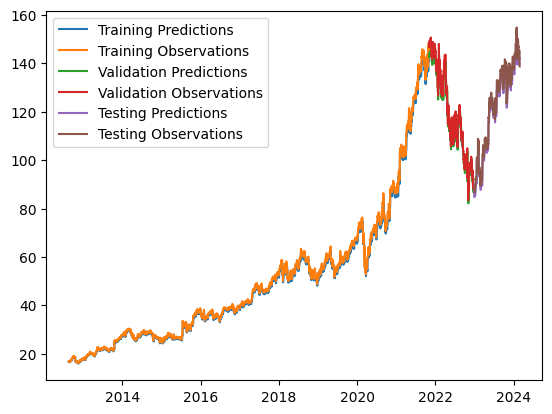

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

model evaluation

In [17]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, Y_val, verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

# Print the results
print(f'Training Loss: {train_loss}, Training accuracy: {train_accuracy}')
print(f'Validation Loss: {val_loss}, Validation accuracy: {val_accuracy}')
print(f'Test Loss: {test_loss}, Test accuracy: {test_accuracy}')

Training Loss: 1.8933134078979492, Training accuracy: 0.9897558093070984
Validation Loss: 10.325826644897461, Validation accuracy: 2.550002336502075
Test Loss: 9.895380973815918, Test accuracy: 2.5373375415802
